In [24]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.optimize import curve_fit
from scipy.optimize import minimize

# Chew-Frantschi

## Exp values

In [21]:
data = {}
data['rho'] = {'J': np.array([1, 2, 3, 4, 5, 6]),\
               'M': np.array([0.775, 1.3183, 1.6888, 1.995, 2.330, 2.450]),
               'E': np.array([0.00025, 0.0005, 0.0021, 0.010, 0.035, 0.130])}
data['omega'] = {'J': np.array([1, 2, 3, 4, 6]),\
                 'M': np.array([0.78265, 1.2755, 1.667, 2.018, 2.469]),\
                 'E': np.array([0.00012, 0.0008, 0.004, 0.011, 0.029])}
data['phi'] = {'J': np.array([1, 2, 3]),\
               'M': np.array([1.019461, 1.525, 1.854]),\
               'E': np.array([0.000016, 0.005, 0.007])}

## Fit

In [37]:
def func(par):
    lam, a0rho, a0omega, a0phi = par[0], par[1], par[2], par[3]
    thyrho = (np.array([1, 2, 3, 4]) - a0rho) * 4.0 * lam
    thyomega = (np.array([1, 2, 3, 4]) - a0omega) * 4.0 * lam
    thyphi = (np.array([1, 2, 3]) - a0phi) * 4.0 * lam
    result = np.sum((thyrho - data['rho']['M'][:4] ** 2) ** 2) \
            + np.sum((thyomega - data['omega']['M'][:4] ** 2) ** 2) \
            + np.sum((thyphi - data['phi']['M'][:3] ** 2) ** 2)
    return result

In [38]:
func([0.25, 0.5, 0.5, 0.5])

2.7062550708723974

In [39]:
minimize(func, [0.25, 0.5, 0.5, 0.5])

      fun: 0.032555518617783316
 hess_inv: array([[0.00252546, 0.01768036, 0.01686305, 0.01639478],
       [0.01768036, 0.21816608, 0.11903687, 0.11514187],
       [0.01686305, 0.11903687, 0.20366985, 0.10770034],
       [0.01639478, 0.11514187, 0.10770034, 0.23169733]])
      jac: array([ 6.66501001e-06,  6.03497028e-07, -2.30688602e-06, -1.99861825e-06])
  message: 'Optimization terminated successfully.'
     nfev: 78
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([0.28728844, 0.50492102, 0.5223153 , 0.02688354])

In [49]:
0.2873 ** 0.5

0.5360037313302959

## plot

In [42]:
def alphat(t, lam, a0):
    return a0 + t / (4.0 * lam)

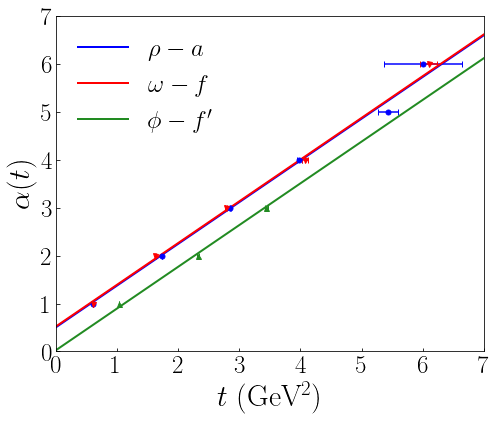

In [69]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 7 * 0.85))

ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(data['rho']['M'] ** 2, data['rho']['J'], xerr = 2.0 * data['rho']['M'] * data['rho']['E'],\
           marker = 'o', markersize = 5, linestyle = '', color = 'blue', capsize = 3)
ax.errorbar(data['omega']['M'] ** 2, data['omega']['J'], xerr = 2.0 * data['omega']['M'] * data['omega']['E'],\
           marker = 'v', markersize = 5, linestyle = '', color = 'red', capsize = 3)
ax.errorbar(data['phi']['M'] ** 2, data['phi']['J'], xerr = 2.0 * data['phi']['M'] * data['phi']['E'],\
           marker = '^', markersize = 5, linestyle = '', color = 'forestgreen', capsize = 3)
t = np.linspace(0,7,50)
c1 = ax.plot(t, alphat(t, 0.2873, 0.5049), linestyle = '-', linewidth = 2, color = 'blue')
c2 = ax.plot(t, alphat(t, 0.2873, 0.5223), linestyle = '-', linewidth = 2, color = 'red')
c3 = ax.plot(t, alphat(t, 0.2873, 0.0269), linestyle = '-', linewidth = 2, color = 'forestgreen')
ax.set_xlim(0,7)
ax.set_ylim(0,7)
ax.set_xlabel(r'$t~\rm (GeV^2)$', size = 30)
ax.set_ylabel(r'$\alpha(t)$', size = 30)
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 25)
L = [(c1[0]), (c2[0]), (c3[0])]
H = [r'$\rho-a$', r'$\omega-f$', r"$\phi-f'$"]
ax.legend(L, H, frameon = False, loc = 'upper left', fontsize = 25)

fig.tight_layout()
fig.savefig('plots/trajectories.pdf')